In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
#df = pd.read_csv('C:/Users/jeanl/Desktop/trial.csv',index_col=False)
df = pd.read_csv("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/IFRC/IFRC_clean_data.csv")


In [3]:
df

,Unnamed: 0,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"['Leaving', 'Millions', 'BehindWorld', 'Disasters', 'Report', '2018The', 'international', 'human...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...,en,"['Leaving', 'Millions', 'BehindWorld', 'Disasters', 'Report', '2018The', 'international', 'human...","['leaving', 'millions', 'behindworld', 'disasters', 'report', '2018the', 'international', 'human...","['leaving', 'millions', 'behindworld', 'disasters', 'report', '2018the', 'international', 'human...","['leaving', 'millions', 'behindworld', 'disasters', 'report', '2018the', 'international', 'human...","[('leaving', 'VBG'), ('millions', 'NNS'), ('behindworld', 'IN'), ('disasters', 'NNS'), ('report'...","[('leaving', 'v'), ('millions', 'n'), ('behindworld', 'n'), ('disasters', 'n'), ('report', 'v'),...","['leave', 'million', 'behindworld', 'disaster', 'report', '2018the', 'international', 'humanitar..."


In [4]:
df = df[['cluster', 'lemmatized']]
df

,cluster,lemmatized
0,IFRC,"['leave', 'million', 'behindworld', 'disaster', 'report', '2018the', 'international', 'humanitar..."


## Sentiment Analysis

In [5]:
#df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
#df

In [6]:
df['sentiment'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
df

,cluster,lemmatized,sentiment
0,IFRC,"['leave', 'million', 'behindworld', 'disaster', 'report', '2018the', 'international', 'humanitar...",0.055057


## IFRC

### Data Exploration

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [7]:
corpus= df['lemmatized']

In [8]:
corpus

0    ['leave', 'million', 'behindworld', 'disaster', 'report', '2018the', 'international', 'humanitar...
Name: lemmatized, dtype: object

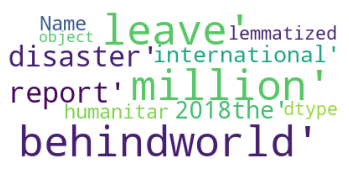

In [9]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Text preparation

Text in the corpus needs to be converted to a format that can be interpreted by the machine learning algorithms. 
There are 2 parts of this conversion

— Tokenisation and Vectorisation.
Tokenisation is the process of converting the continuous text into a list of words. 
The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.

For text preparation we use the bag of words model which ignores the sequence of the words and only considers word frequencies.

### Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words.
We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=1.0, min_df=1, max_features=None, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [11]:
list(cv.vocabulary_.keys())[:50]


['leave',
 'million',
 'behindworld',
 'disaster',
 'report',
 '2018the',
 'international',
 'humanitarian',
 'sector',
 'must',
 'respond',
 'need',
 'world',
 'vulnerable',
 'people',
 'federation',
 'red',
 'cross',
 'crescent',
 'society',
 'large',
 'volunteer',
 'based',
 'network',
 'member',
 'national',
 'worldwide',
 'virtually',
 'every',
 'community',
 'reach',
 'annually',
 'long',
 'term',
 'service',
 'development',
 'programmes',
 'well',
 'response',
 'early',
 'recovery',
 'programme',
 'act',
 'aˇer',
 'health',
 'emergency',
 'meet',
 'improve',
 'live',
 'impartiality']

### Unigram Bigram and trigram 

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

[Text(0, 0, 'ifrc'),
 Text(1, 0, 'humanitarian'),
 Text(2, 0, 'people'),
 Text(3, 0, 'national'),
 Text(4, 0, 'society'),
 Text(5, 0, 'support'),
 Text(6, 0, 'red'),
 Text(7, 0, 'disaster'),
 Text(8, 0, 'need'),
 Text(9, 0, 'international'),
 Text(10, 0, '2018'),
 Text(11, 0, 'response'),
 Text(12, 0, 'risk'),
 Text(13, 0, 'cross'),
 Text(14, 0, 'include'),
 Text(15, 0, 'community'),
 Text(16, 0, 'data'),
 Text(17, 0, 'country'),
 Text(18, 0, 'work'),
 Text(19, 0, 'emergency')]

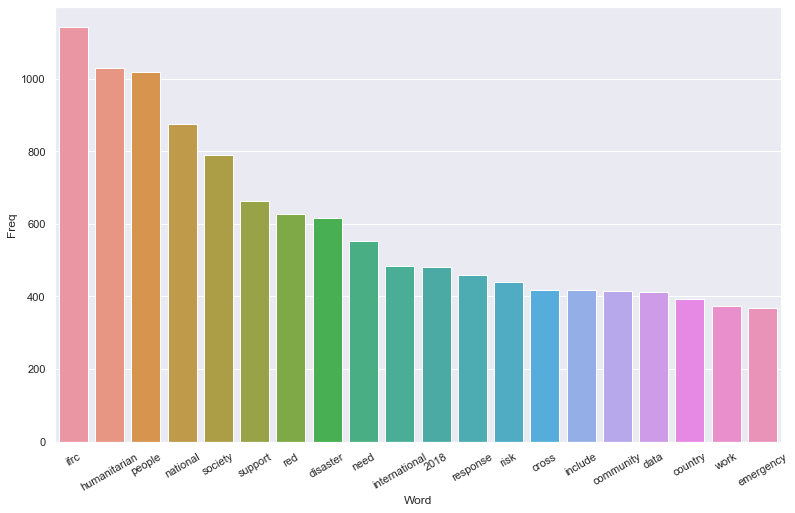

In [12]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                      Bi-gram  Freq
0            national society   613
1                   red cross   403
2                red crescent   212
3                   cross red   176
4           person disability   118
5                  old people   117
6            support national   111
7            crescent society   104
8               disaster risk   100
9         humanitarian action    90
10             risk reduction    90
11    humanitarian assistance    87
12                      et al    81
13                people need    79
14              people person    76
15                      of ce    72
16                  signi can    71
17        humanitarian sector    70
18      humanitarian response    65
19  humanitarian organization    61


[Text(0, 0, 'national society'),
 Text(1, 0, 'red cross'),
 Text(2, 0, 'red crescent'),
 Text(3, 0, 'cross red'),
 Text(4, 0, 'person disability'),
 Text(5, 0, 'old people'),
 Text(6, 0, 'support national'),
 Text(7, 0, 'crescent society'),
 Text(8, 0, 'disaster risk'),
 Text(9, 0, 'humanitarian action'),
 Text(10, 0, 'risk reduction'),
 Text(11, 0, 'humanitarian assistance'),
 Text(12, 0, 'et al'),
 Text(13, 0, 'people need'),
 Text(14, 0, 'people person'),
 Text(15, 0, 'of ce'),
 Text(16, 0, 'signi can'),
 Text(17, 0, 'humanitarian sector'),
 Text(18, 0, 'humanitarian response'),
 Text(19, 0, 'humanitarian organization')]

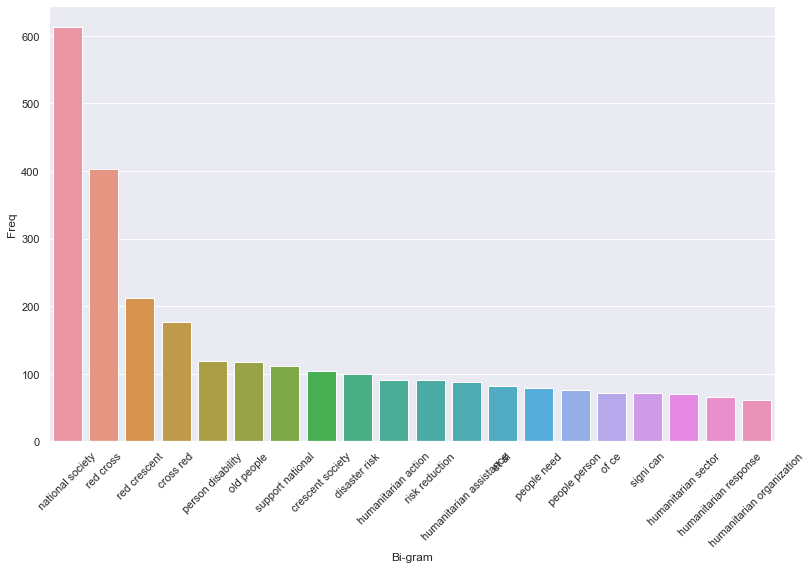

In [13]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0                  red cross red   174
1             cross red crescent   170
2           red crescent society   104
3       support national society   103
4              old people person    69
5        disaster risk reduction    69
6       people person disability    68
7   international federation red    59
8           federation red cross    59
9             annual report 2018    36
10       crescent society annual    35
11         society annual report    35
12         world disaster report    34
13             red cross society    33
14         ifrc support national    30
15                regional of ce    29
16            national red cross    28
17         national society ifrc    28
18              leave one behind    27
19         gender based violence    25


[Text(0, 0, 'red cross red'),
 Text(1, 0, 'cross red crescent'),
 Text(2, 0, 'red crescent society'),
 Text(3, 0, 'support national society'),
 Text(4, 0, 'old people person'),
 Text(5, 0, 'disaster risk reduction'),
 Text(6, 0, 'people person disability'),
 Text(7, 0, 'international federation red'),
 Text(8, 0, 'federation red cross'),
 Text(9, 0, 'annual report 2018'),
 Text(10, 0, 'crescent society annual'),
 Text(11, 0, 'society annual report'),
 Text(12, 0, 'world disaster report'),
 Text(13, 0, 'red cross society'),
 Text(14, 0, 'ifrc support national'),
 Text(15, 0, 'regional of ce'),
 Text(16, 0, 'national red cross'),
 Text(17, 0, 'national society ifrc'),
 Text(18, 0, 'leave one behind'),
 Text(19, 0, 'gender based violence')]

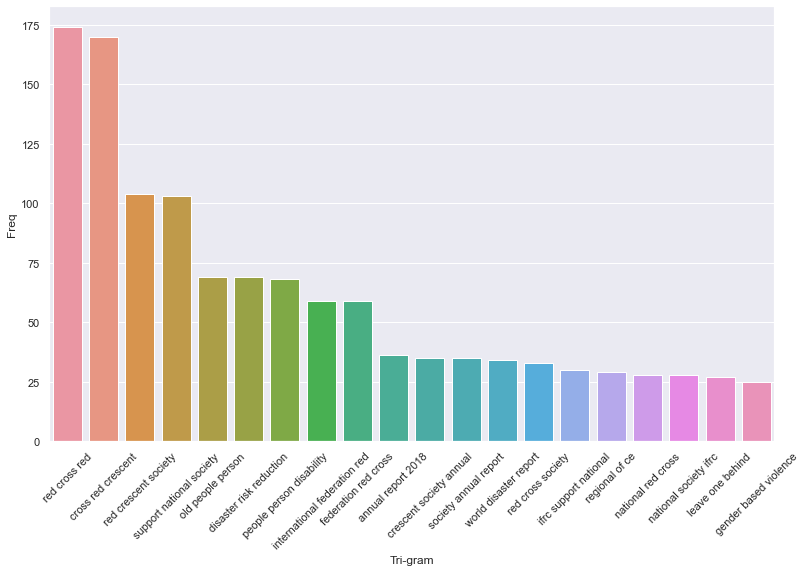

In [14]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Topic Modeling

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [15]:


tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(df['lemmatized'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,000,0008006004002000,000km,003,012,020,0222chad588,030,035pakistan,039,...,ﬁunless,ﬁwell,ﬁwhat,ﬁwhen,ﬁwhile,ﬁwho,ﬁwhy,ﬁwithin,ﬂexperience,ﬂworld
0,91,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Latent Dirichlet Allocation (LDA) Topic Modeling

In [16]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=50, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
ifrc national humanitarian people society disaster need support response international
Topic 1:
humanitarian ifrc people national support society cross 2018 red disaster
Topic 2:
people humanitarian ifrc national support society need cross red risk
Topic 3:
ifrc humanitarian national society people support red international disaster cross
Topic 4:
ifrc national people humanitarian disaster society need support red crisis
Topic 5:
ifrc national people humanitarian society red 2018 international response work
Topic 6:
humanitarian people ifrc society national support international need disaster community
Topic 7:
ifrc humanitarian people national society support red disaster need international
Topic 8:
ifrc people national red humanitarian disaster support need cross also
Topic 9:
humanitarian ifrc people society red national disaster need international support


### pyLDAvis

In [17]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel


C:\Users\mwamb\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7       31.754704   75.460747       1        1  99.998967
1     -139.854660  -22.979733       2        1   0.000115
5      103.648361  -21.021099       3        1   0.000115
8      -90.646576  111.807877       4        1   0.000115
3      -43.787243 -156.313019       5        1   0.000115
9      223.829559  -42.775616       6        1   0.000115
2      169.609894  101.373894       7        1   0.000115
4      -15.944229  -35.101406       8        1   0.000115
0       99.906296 -149.138031       9        1   0.000115
6       49.532284  196.405975      10        1   0.000115, topic_info=     Category         Freq          Term        Total  loglift  logprob
4442  Default  1127.000000          ifrc  1127.000000  30.0000  30.0000
4360  Default  1015.000000  humanitarian  1015.000000  29.0000  29.0000
6538  Default  1005.000000        people  1005.000000  28.0000  28.0000
5909  Default   865.000000      national   865.000000  27.0000  27.0000
7990  Default   781.000000       society   781.000000  26.0000  26.0000
...       ...          ...           ...          ...      ...      ...
1295  Topic10     0.000011    assistance   329.167249  -3.4950  -9.0740
4073  Topic10     0.000011         group   210.630215  -3.0544  -9.0798
833   Topic10     0.000011        access   275.863051  -3.3223  -9.0779
5289  Topic10     0.000011         local   322.259618  -3.4772  -9.0774
7423  Topic10     0.000011      response   453.738558  -3.8176  -9.0756

[645 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
8         1  0.913207      035pakistan
16        1  0.913475              090
28        1  0.914957     103emergency
127       1  0.913960              153
136       1  0.913808              158
...     ...       ...              ...
9674      1  0.914619  ﬁprioritisation
9677      1  0.914056       ﬁpromoting
9682      1  0.912499       ﬁrecognize
9686      1  0.915039          ﬁremove
9715      1  0.912873          ﬁwithin

[345 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 6, 9, 4, 10, 3, 5, 1, 7])